# Generate results table

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

def get_accs(exp_name, mode='sys', project_name='CGQA', name='Top1_Acc_Stream/eval_phase/test_stream', index=''):

    if mode == 'continual':
        if not os.path.exists(os.path.join('../../../avalanche-experiments', project_name, exp_name, f'results-{exp_name}{index}.npy')):
            return np.array([0])

        results = np.load(os.path.join('../../../avalanche-experiments', project_name, exp_name, f'results-{exp_name}{index}.npy'), allow_pickle=True)

    else:
        if not os.path.exists(os.path.join('../../../avalanche-experiments', project_name, exp_name, f'results-{exp_name}-{mode}-naive-frz.npy')):
            return np.array([0])

        results = np.load(os.path.join('../../../avalanche-experiments', project_name, exp_name, f'results-{exp_name}-{mode}-naive-frz.npy'), allow_pickle=True)

    accs = []

    for k, v in results[-1].items():
        if k.startswith(name):
            accs.append(v)

    return np.array(accs)


# Load one exp

In [70]:

return_task_id = True
exp_name = 'ht-vit-gem-tsk-lr0_0001'
# exps = ['naive-cls-lr0_003', 'er-cls-lr0_003', 'gem-cls-lr0_01-p32-m0_3', 'lwf-cls-lr0_005-a1-t1', 'ewc-cls-lr0_005-lambda0_1']
# exps = ['naive-tsk-lr0_008', 'er-tsk-lr0_0008', 'gem-tsk-lr0_001-p32-m0_3', 'lwf-tsk-lr0_01-a1-t1', 'ewc-tsk-lr0_005-lambda2']
# Multi-task: MT-naive-tsk_False-lr0_005; MT-naive-tsk_True-lr0_001
# VIT baselines:
#     ht-vit-naive-cls-lr0_0001; ht-vit-naive-tsk-lr0_0001;
#     ht-vit-er-cls-lr0_0001; ht-vit-er-tsk-lr0_0001;
#     ht-vit-gem-cls-lr5e-05; ht-vit-gem-tsk-lr1e-05;
#     ht-vit-lwf-cls-lr0_0001; ht-vit-lwf-tsk-lr0_0001
#     ht-vit-ewc-cls-lr0_0001; ht-vit-ewc-tsk-lr0_0001

results = np.load(os.path.join('../../../avalanche-experiments', 'CGQA', exp_name, f'results-{exp_name}.npy'), allow_pickle=True)
first_result = results[0]
last_result = results[-1]
print('Test acc:', get_accs(exp_name, mode='continual', name='Top1_Acc_Stream/eval_phase/test_stream'))
# 只有最后一个task的test acc，奇怪
print([k for k in last_result.keys() if k.startswith('Top1_Acc_Exp/eval_phase/test_stream')])

Test acc: [0.18  0.138 0.127 0.192 0.227 0.316 0.313 0.384 0.884 0.1  ]
['Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000', 'Top1_Acc_Exp/eval_phase/test_stream/Task001/Exp001', 'Top1_Acc_Exp/eval_phase/test_stream/Task002/Exp002', 'Top1_Acc_Exp/eval_phase/test_stream/Task003/Exp003', 'Top1_Acc_Exp/eval_phase/test_stream/Task004/Exp004', 'Top1_Acc_Exp/eval_phase/test_stream/Task005/Exp005', 'Top1_Acc_Exp/eval_phase/test_stream/Task006/Exp006', 'Top1_Acc_Exp/eval_phase/test_stream/Task007/Exp007', 'Top1_Acc_Exp/eval_phase/test_stream/Task008/Exp008', 'Top1_Acc_Exp/eval_phase/test_stream/Task009/Exp009']


\begin{tabular}{lrrrrrrrrrr}
{Task} & {0} & {1} & {2} & {3} & {4} & {5} & {6} & {7} & {8} & {9} \\
{Exp} & {} & {} & {} & {} & {} & {} & {} & {} & {} & {} \\
0 & 52.900000 & 10.000000 & 10.000000 & 10.000000 & 10.000000 & 10.000000 & 10.000000 & 10.000000 & 10.000000 & 10.000000 \\
1 & 40.200000 & 58.200000 & 10.000000 & 10.000000 & 10.000000 & 10.000000 & 10.000000 & 10.000000 & 10.000000 & 10.000000 \\
2 & 24.600000 & 45.300000 & 57.300000 & 10.000000 & 10.000000 & 10.000000 & 10.000000 & 10.000000 & 10.000000 & 10.000000 \\
3 & 27.300000 & 32.300000 & 43.700000 & 68.700000 & 10.000000 & 10.000000 & 10.000000 & 10.000000 & 10.000000 & 10.000000 \\
4 & 23.700000 & 21.900000 & 26.900000 & 43.900000 & 64.000000 & 10.000000 & 10.000000 & 10.000000 & 10.000000 & 10.000000 \\
5 & 21.500000 & 17.200000 & 26.400000 & 34.100000 & 49.600000 & 66.800000 & 10.000000 & 10.000000 & 10.000000 & 10.000000 \\
6 & 18.300000 & 17.800000 & 23.500000 & 29.700000 & 32.300000 & 46.900000 & 64.600000 & 10.0

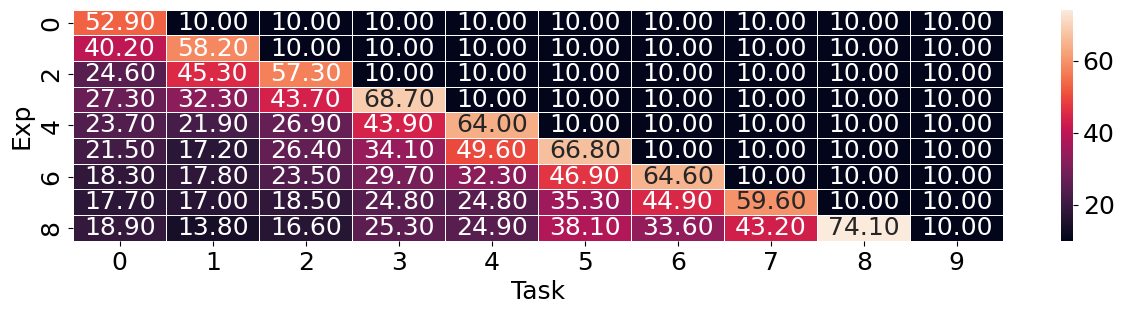

In [69]:
'''collect exps'''
collected_data = []

for exp_id, exp_results in enumerate(results):     # all ten results
    for task_id in range(10):
        if return_task_id:
            task_id_str = '%03d' % task_id    # task-il: 000 -> 009
        else:
            task_id_str = '%03d' % 0    # class-il: 000
        exp_id_str = '%03d' % task_id   # 000 -> 009
        result = exp_results[f'Top1_Acc_Exp/eval_phase/test_stream/Task{task_id_str}/Exp{exp_id_str}']
        collected_data.append(pd.DataFrame({'Method': exp_name, 'Exp': exp_id, 'Task': task_id, 'Accuracy': result*100}, index=[0]))

collected_data = pd.concat(collected_data, ignore_index=True)

# to latex

data = collected_data.pivot(index='Exp', columns='Task', values='Accuracy')
# data = data[modes]
# data = data.reindex(exps_dis)
print(data.style.to_latex())
print(data)

plt.figure(figsize=(15, 3))
# sns.set_palette('Paired')
matplotlib.rcParams.update({'font.size': 18})

# ax = sns.scatterplot(x="Weight", y="learning rate", data=collected_data, hue='Method')
# plt.legend(loc = 'upper left', bbox_to_anchor = (1, 1))
# ax = sns.heatmap(collected_data.pivot("Method", "learning rate", "Accuracy"), annot=True, fmt=".2f", linewidth=.5)
ax = sns.heatmap(data, annot=True, fmt=".2f", linewidth=.5)
# ax = px.line(collected_data, x="Train size", y="Accuracy", hover_data=['Accuracy', 'Method'], color='Method')
# ax.show()

# plt.ylim([5, 6.5])

fig = ax.get_figure()
fig.savefig(os.path.join('D:', 'Downloads', 'fig.png'), dpi = 400, bbox_inches='tight')

# Generate average test table

In [7]:
'''collect exps'''
project_name = 'COBJ'

# modes = ['continual', 'sys', 'pro', 'sub', 'non', 'noc']
modes = ['continual', 'sys', 'pro', 'non', 'noc']

# '''resnet18'''
# exps = ['naive-cls-lr0_003', 'er-cls-lr0_003', 'gem-cls-lr0_01-p32-m0_3', 'lwf-cls-lr0_005-a1-t1', 'ewc-cls-lr0_005-lambda0_1']
# exps_dis = ['Finetune', 'ER', 'GEM', 'LwF', 'EWC']
# exps = ['naive-tsk-lr0_008', 'er-tsk-lr0_0008', 'gem-tsk-lr0_001-p32-m0_3', 'lwf-tsk-lr0_01-a1-t1', 'ewc-tsk-lr0_005-lambda2']
# exps_dis = ['Finetune*', 'ER*', 'GEM*', 'LwF*', 'EWC*']

'''vit'''
# exps = ['ht-vit-naive-cls-lr0_0001', 'ht-vit-er-cls-lr0_0001', 'ht-vit-gem-cls-lr5e-05', 'ht-vit-lwf-cls-lr0_0001', 'ht-vit-ewc-cls-lr0_0001']
# exps_dis = ['Finetune', 'ER', 'GEM', 'LwF', 'EWC']
# exps = ['ht-vit-naive-tsk-lr0_0001', 'ht-vit-er-tsk-lr0_0001', 'ht-vit-gem-tsk-lr1e-05', 'ht-vit-lwf-tsk-lr0_0001', 'ht-vit-ewc-tsk-lr0_0001']
# exps_dis = ['Finetune*', 'ER*', 'GEM*', 'LwF*', 'EWC*']

'''concept'''
# exps = [
#         f'concept-concept-tsk_True-lr0_01-w1',
#         f'concept-concept-tsk_False-lr0_001-w0_5',
#     ]
# exps_dis = ['Task-IL', 'Class-IL']

'''Multi Task'''
# exps = [
#     f'MT-naive-tsk_{return_task_id}-lr{learning_rate}'
#     for return_task_id in [True, False]
#     for learning_rate in ['0_0001', '0_0005', '0_001', '0_005', '0_01', '0_05', '0_1']
#     ]
# exps_dis = [
#     f"{'Task' if return_task_id else 'Class'} lr{learning_rate}"
#     for return_task_id in [True, False]
#     for learning_rate in ['0.0001', '0.0005', '0.001', '0.005', '0.01', '0.05', '0.1']
# ]

'''Random model'''
# exps = [
#     'random-naive-tsk_False'
#     ]
# exps_dis = [
#     'random'
# ]

'''Multi Task COBJ'''
exps = [
    f'res-naive-tsk_{return_task_id}-lr{learning_rate}'
    for return_task_id in [True, False]
    for learning_rate in ['1e-05', '0_0001', '0_001', '0_01']
    ]
exps_dis = [
    f"{'Task' if return_task_id else 'Class'} lr{learning_rate}"
    for return_task_id in [True, False]
    for learning_rate in ['1e-05', '1e-4', '1e-3', '1e-2']
]

collected_data = []
for exp_idx, exp_name in enumerate(exps):
    print(exp_name)
    for mode in modes:
        print(mode)
        accs = get_accs(exp_name, mode, project_name=project_name)
        # print(accs)
        collected_data.append(pd.DataFrame({'Method': exps_dis[exp_idx], 'Phase': mode, 'Accuracy': accs}))

collected_data = pd.concat(collected_data, ignore_index=True)

res-naive-tsk_True-lr1e-05
continual
sys
pro
non
noc
res-naive-tsk_True-lr0_0001
continual
sys
pro
non
noc
res-naive-tsk_True-lr0_001
continual
sys
pro
non
noc
res-naive-tsk_True-lr0_01
continual
sys
pro
non
noc
res-naive-tsk_False-lr1e-05
continual
sys
pro
non
noc
res-naive-tsk_False-lr0_0001
continual
sys
pro
non
noc
res-naive-tsk_False-lr0_001
continual
sys
pro
non
noc
res-naive-tsk_False-lr0_01
continual
sys
pro
non
noc


In [21]:
'''cal mean and ci95, then formulate table str-cell and to latex.'''
# exp = 'Finetune'
# mode = 'continual'
# acc_list = collected_data[(collected_data['Method'] == exp) & (collected_data['Phase'] == mode)]['Accuracy']
data = []
for exp in exps_dis:
    for mode in modes:
        acc_list = collected_data[(collected_data['Method'] == exp) & (collected_data['Phase'] == mode)]['Accuracy']
        mean = acc_list.mean()
        ci95 = 1.96 * (acc_list.std()/np.sqrt(len(acc_list)))
        acc_str = f'{mean*100:.2f} +- {ci95*100:.2f}' if mode != 'continual' else f'{mean*100:.2f}'
        data.append(pd.DataFrame({'Method': exp, 'Phase': mode, 'mean': mean, 'ci95': ci95, 'str': acc_str}, index=[0]))
data = pd.concat(data, ignore_index=True)
# print(data)

# to latex

data = data.pivot(index='Method', values='str', columns='Phase')
data = data[modes]
data = data.reindex(exps_dis)
print(data.style.to_latex().replace('+-', '$\\pm$'))
data.head()

\begin{tabular}{lllllll}
{Phase} & {continual} & {sys} & {pro} & {sub} & {non} & {noc} \\
{Method} & {} & {} & {} & {} & {} & {} \\
Task lr0.0001 & 89.67 & 79.36 $\pm$ 0.76 & 79.16 $\pm$ 0.79 & 64.07 $\pm$ 0.79 & 84.72 $\pm$ 0.63 & 37.38 $\pm$ 0.96 \\
Task lr0.0005 & 0.00 & 0.00 $\pm$ nan & 0.00 $\pm$ nan & 0.00 $\pm$ nan & 0.00 $\pm$ nan & 0.00 $\pm$ nan \\
Task lr0.001 & 92.17 & 82.16 $\pm$ 0.68 & 84.22 $\pm$ 0.60 & 71.82 $\pm$ 0.75 & 86.44 $\pm$ 0.69 & 44.07 $\pm$ 0.95 \\
Task lr0.005 & 91.08 & 76.28 $\pm$ 0.84 & 77.07 $\pm$ 0.93 & 65.41 $\pm$ 0.85 & 81.28 $\pm$ 0.75 & 39.72 $\pm$ 0.95 \\
Task lr0.01 & 89.14 & 68.97 $\pm$ 1.12 & 66.65 $\pm$ 1.27 & 58.87 $\pm$ 1.10 & 74.98 $\pm$ 0.88 & 34.59 $\pm$ 1.20 \\
Task lr0.05 & 86.48 & 55.15 $\pm$ 1.09 & 49.63 $\pm$ 1.16 & 0.00 $\pm$ nan & 0.00 $\pm$ nan & 0.00 $\pm$ nan \\
Task lr0.1 & 80.34 & 13.43 $\pm$ 0.75 & 12.90 $\pm$ 0.62 & 12.27 $\pm$ 0.64 & 14.50 $\pm$ 0.99 & 11.02 $\pm$ 0.39 \\
Class lr0.0001 & 71.48 & 86.75 $\pm$ 0.60 & 83.26 $\pm

Phase,continual,sys,pro,sub,non,noc
Method,,,,,,
Task lr0.0001,89.67,79.36 +- 0.76,79.16 +- 0.79,64.07 +- 0.79,84.72 +- 0.63,37.38 +- 0.96
Task lr0.0005,0.00,0.00 +- nan,0.00 +- nan,0.00 +- nan,0.00 +- nan,0.00 +- nan
Task lr0.001,92.17,82.16 +- 0.68,84.22 +- 0.60,71.82 +- 0.75,86.44 +- 0.69,44.07 +- 0.95
Task lr0.005,91.08,76.28 +- 0.84,77.07 +- 0.93,65.41 +- 0.85,81.28 +- 0.75,39.72 +- 0.95
Task lr0.01,89.14,68.97 +- 1.12,66.65 +- 1.27,58.87 +- 1.10,74.98 +- 0.88,34.59 +- 1.20


In [22]:
'''cal mean and ci95 and relative score, then formulate table str-cell and to latex.'''
data = []
for exp in exps_dis:
    mean_dict = {}
    for mode in modes:
        acc_list = collected_data[(collected_data['Method'] == exp) & (collected_data['Phase'] == mode)]['Accuracy']
        mean = acc_list.mean()
        mean_dict[mode] = mean
        ci95 = 1.96 * (acc_list.std()/np.sqrt(len(acc_list)))
        acc_str = f'{mean*100:.2f} +- {ci95*100:.2f}' if mode != 'continual' else f'{mean*100:.2f}'
        data.append(pd.DataFrame({'Method': exp, 'Phase': mode, 'mean': mean, 'ci95': ci95, 'str': acc_str}, index=[0]))

    for mode, mean in mean_dict.items():
        score = (mean - mean_dict['non']) / mean_dict['non']
        data.append(pd.DataFrame({'Method': exp, 'Phase': f'{mode}_score', 'str': f'{score*100:+.2f}'}, index=[0]))

    # todo: try Harmonic mean

data = pd.concat(data, ignore_index=True)
# print(data)

# to latex

data = data.pivot(index='Method', values='str', columns='Phase')
data = data[['continual', 'continual_score', 'sys', 'sys_score', 'pro', 'pro_score', 'sub', 'sub_score', 'non', 'non_score',  'noc', 'noc_score']]
data = data.reindex(exps_dis)
print(data.style.to_latex().replace('+-', '$\\pm$'))
data.head()

C:\Users\ASUS\anaconda3\envs\avalanche\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
C:\Users\ASUS\anaconda3\envs\avalanche\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


\begin{tabular}{lllllllllllll}
{Phase} & {continual} & {continual_score} & {sys} & {sys_score} & {pro} & {pro_score} & {sub} & {sub_score} & {non} & {non_score} & {noc} & {noc_score} \\
{Method} & {} & {} & {} & {} & {} & {} & {} & {} & {} & {} & {} & {} \\
Task lr0.0001 & 89.67 & +5.84 & 79.36 $\pm$ 0.76 & -6.33 & 79.16 $\pm$ 0.79 & -6.56 & 64.07 $\pm$ 0.79 & -24.38 & 84.72 $\pm$ 0.63 & +0.00 & 37.38 $\pm$ 0.96 & -55.88 \\
Task lr0.0005 & 0.00 & +nan & 0.00 $\pm$ nan & +nan & 0.00 $\pm$ nan & +nan & 0.00 $\pm$ nan & +nan & 0.00 $\pm$ nan & +nan & 0.00 $\pm$ nan & +nan \\
Task lr0.001 & 92.17 & +6.63 & 82.16 $\pm$ 0.68 & -4.95 & 84.22 $\pm$ 0.60 & -2.56 & 71.82 $\pm$ 0.75 & -16.91 & 86.44 $\pm$ 0.69 & +0.00 & 44.07 $\pm$ 0.95 & -49.01 \\
Task lr0.005 & 91.08 & +12.05 & 76.28 $\pm$ 0.84 & -6.15 & 77.07 $\pm$ 0.93 & -5.18 & 65.41 $\pm$ 0.85 & -19.53 & 81.28 $\pm$ 0.75 & +0.00 & 39.72 $\pm$ 0.95 & -51.14 \\
Task lr0.01 & 89.14 & +18.88 & 68.97 $\pm$ 1.12 & -8.02 & 66.65 $\pm$ 1.27 & -11.1

Phase,continual,continual_score,sys,sys_score,pro,pro_score,sub,sub_score,non,non_score,noc,noc_score
Method,,,,,,,,,,,,
Task lr0.0001,89.67,+5.84,79.36 +- 0.76,-6.33,79.16 +- 0.79,-6.56,64.07 +- 0.79,-24.38,84.72 +- 0.63,+0.00,37.38 +- 0.96,-55.88
Task lr0.0005,0.00,+nan,0.00 +- nan,+nan,0.00 +- nan,+nan,0.00 +- nan,+nan,0.00 +- nan,+nan,0.00 +- nan,+nan
Task lr0.001,92.17,+6.63,82.16 +- 0.68,-4.95,84.22 +- 0.60,-2.56,71.82 +- 0.75,-16.91,86.44 +- 0.69,+0.00,44.07 +- 0.95,-49.01
Task lr0.005,91.08,+12.05,76.28 +- 0.84,-6.15,77.07 +- 0.93,-5.18,65.41 +- 0.85,-19.53,81.28 +- 0.75,+0.00,39.72 +- 0.95,-51.14
Task lr0.01,89.14,+18.88,68.97 +- 1.12,-8.02,66.65 +- 1.27,-11.11,58.87 +- 1.10,-21.49,74.98 +- 0.88,+0.00,34.59 +- 1.20,-53.87


In [5]:
'''todo: cal Harmonic mean (among sys, pro, sub) and Harmonic mean (between non, noc)'''
data = []
for exp in exps_dis:
    mean_dict = {}
    for mode in modes:
        acc_list = collected_data[(collected_data['Method'] == exp) & (collected_data['Phase'] == mode)]['Accuracy']
        mean = acc_list.mean()
        mean_dict[mode] = mean
        ci95 = 1.96 * (acc_list.std()/np.sqrt(len(acc_list)))
        acc_str = f'{mean*100:.2f} +- {ci95*100:.2f}' if mode != 'continual' else f'{mean*100:.2f}'
        data.append(pd.DataFrame({'Method': exp, 'Phase': mode, 'mean': mean, 'ci95': ci95, 'str': acc_str}, index=[0]))

    # 3x1*x2*x3/(x1*x2+x1*x3+x2*x3)
    hm_nov = 3 * mean_dict['sys'] * mean_dict['pro'] * mean_dict['sub'] / (mean_dict['sys'] * mean_dict['pro'] + mean_dict['sys'] * mean_dict['sub'] + mean_dict['pro'] * mean_dict['sub'])
    data.append(pd.DataFrame({'Method': exp, 'Phase': f'Hn', 'str': f'{hm_nov*100:.2f}'}, index=[0]))

    # 2x1*x2/(x1+x2)
    hm_ref = 2 * mean_dict['non'] * mean_dict['noc'] / (mean_dict['non'] + mean_dict['noc'])
    data.append(pd.DataFrame({'Method': exp, 'Phase': f'Hr', 'str': f'{hm_ref*100:.2f}'}, index=[0]))

    hm_all = 5 / (1/mean_dict['sys'] + 1/mean_dict['pro'] + 1/mean_dict['sub'] + 1/mean_dict['non'] + 1/mean_dict['noc'])
    data.append(pd.DataFrame({'Method': exp, 'Phase': f'Ha', 'str': f'{hm_all*100:.2f}'}, index=[0]))

data = pd.concat(data, ignore_index=True)
# print(data)

# to latex

data = data.pivot(index='Method', values='str', columns='Phase')
data = data[['continual', 'sys', 'pro', 'sub', 'Hn', 'non',  'noc', 'Hr', 'Ha']]
data = data.reindex(exps_dis)
print(data.style.to_latex().replace('+-', '$\\pm$'))
data

C:\Users\ASUS\anaconda3\envs\avalanche\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
C:\Users\ASUS\anaconda3\envs\avalanche\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\ASUS\anaconda3\envs\avalanche\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


\begin{tabular}{lllllllll}
{Phase} & {continual} & {sys} & {pro} & {Hn} & {non} & {noc} & {Hr} & {Ha} \\
{Method} & {} & {} & {} & {} & {} & {} & {} & {} \\
Task lr1e-5 & 0.00 & 0.00 $\pm$ nan & 0.00 $\pm$ nan & nan & 0.00 $\pm$ nan & 0.00 $\pm$ nan & nan & 0.00 \\
Task lr1e-4 & 73.70 & 71.27 $\pm$ 1.66 & 74.55 $\pm$ 1.64 & 72.87 & 0.00 $\pm$ nan & 0.00 $\pm$ nan & nan & 0.00 \\
Task lr1e-3 & 72.75 & 70.87 $\pm$ 1.71 & 74.08 $\pm$ 1.75 & 72.44 & 0.00 $\pm$ nan & 0.00 $\pm$ nan & nan & 0.00 \\
Task lr1e-2 & 73.00 & 66.75 $\pm$ 1.54 & 70.23 $\pm$ 1.71 & 68.45 & 0.00 $\pm$ nan & 0.00 $\pm$ nan & nan & 0.00 \\
Class lr1e-5 & 0.00 & 0.00 $\pm$ nan & 0.00 $\pm$ nan & nan & 0.00 $\pm$ nan & 0.00 $\pm$ nan & nan & 0.00 \\
Class lr1e-4 & 25.10 & 76.93 $\pm$ 1.49 & 79.40 $\pm$ 1.68 & 78.15 & 0.00 $\pm$ nan & 0.00 $\pm$ nan & nan & 0.00 \\
Class lr1e-3 & 38.50 & 81.78 $\pm$ 1.45 & 84.62 $\pm$ 1.40 & 83.18 & 0.00 $\pm$ nan & 0.00 $\pm$ nan & nan & 0.00 \\
Class lr1e-2 & 39.10 & 77.60 $\pm$ 1.56 & 

Phase,continual,sys,pro,Hn,non,noc,Hr,Ha
Method,,,,,,,,
Task lr1e-5,0.00,0.00 +- nan,0.00 +- nan,nan,0.00 +- nan,0.00 +- nan,nan,0.00
Task lr1e-4,73.70,71.27 +- 1.66,74.55 +- 1.64,72.87,0.00 +- nan,0.00 +- nan,nan,0.00
Task lr1e-3,72.75,70.87 +- 1.71,74.08 +- 1.75,72.44,0.00 +- nan,0.00 +- nan,nan,0.00
Task lr1e-2,73.00,66.75 +- 1.54,70.23 +- 1.71,68.45,0.00 +- nan,0.00 +- nan,nan,0.00
Class lr1e-5,0.00,0.00 +- nan,0.00 +- nan,nan,0.00 +- nan,0.00 +- nan,nan,0.00
Class lr1e-4,25.10,76.93 +- 1.49,79.40 +- 1.68,78.15,0.00 +- nan,0.00 +- nan,nan,0.00
Class lr1e-3,38.50,81.78 +- 1.45,84.62 +- 1.40,83.18,0.00 +- nan,0.00 +- nan,nan,0.00
Class lr1e-2,39.10,77.60 +- 1.56,81.28 +- 1.57,79.40,0.00 +- nan,0.00 +- nan,nan,0.00


In [8]:
'''For COBJ, no sub cal Harmonic mean (among sys, pro) and Harmonic mean (between non, noc)'''
data = []
for exp in exps_dis:
    mean_dict = {}
    for mode in modes:
        acc_list = collected_data[(collected_data['Method'] == exp) & (collected_data['Phase'] == mode)]['Accuracy']
        mean = acc_list.mean()
        mean_dict[mode] = mean
        ci95 = 1.96 * (acc_list.std()/np.sqrt(len(acc_list)))
        acc_str = f'{mean*100:.2f} +- {ci95*100:.2f}' if mode != 'continual' else f'{mean*100:.2f}'
        data.append(pd.DataFrame({'Method': exp, 'Phase': mode, 'mean': mean, 'ci95': ci95, 'str': acc_str}, index=[0]))

    # 3x1*x2*x3/(x1*x2+x1*x3+x2*x3)
    # hm_nov = 3 * mean_dict['sys'] * mean_dict['pro'] * mean_dict['sub'] / (mean_dict['sys'] * mean_dict['pro'] + mean_dict['sys'] * mean_dict['sub'] + mean_dict['pro'] * mean_dict['sub'])
    hm_nov = 2 * mean_dict['sys'] * mean_dict['pro'] / (mean_dict['sys'] + mean_dict['pro'])
    data.append(pd.DataFrame({'Method': exp, 'Phase': f'Hn', 'str': f'{hm_nov*100:.2f}'}, index=[0]))

    # 2x1*x2/(x1+x2)
    hm_ref = 2 * mean_dict['non'] * mean_dict['noc'] / (mean_dict['non'] + mean_dict['noc'])
    data.append(pd.DataFrame({'Method': exp, 'Phase': f'Hr', 'str': f'{hm_ref*100:.2f}'}, index=[0]))

    # hm_all = 5 / (1/mean_dict['sys'] + 1/mean_dict['pro'] + 1/mean_dict['sub'] + 1/mean_dict['non'] + 1/mean_dict['noc'])
    hm_all = 4 / (1/mean_dict['sys'] + 1/mean_dict['pro'] + 1/mean_dict['non'] + 1/mean_dict['noc'])
    data.append(pd.DataFrame({'Method': exp, 'Phase': f'Ha', 'str': f'{hm_all*100:.2f}'}, index=[0]))

data = pd.concat(data, ignore_index=True)
# print(data)

# to latex

data = data.pivot(index='Method', values='str', columns='Phase')
# data = data[['continual', 'sys', 'pro', 'sub', 'Hn', 'non',  'noc', 'Hr', 'Ha']]
data = data[['continual', 'sys', 'pro', 'Hn', 'non',  'noc', 'Hr', 'Ha']]
data = data.reindex(exps_dis)
print(data.style.to_latex().replace('+-', '$\\pm$'))
data

\begin{tabular}{lllllllll}
{Phase} & {continual} & {sys} & {pro} & {Hn} & {non} & {noc} & {Hr} & {Ha} \\
{Method} & {} & {} & {} & {} & {} & {} & {} & {} \\
Task lr1e-05 & 71.35 & 71.13 $\pm$ 1.60 & 72.87 $\pm$ 1.61 & 71.99 & 0.00 $\pm$ nan & 0.00 $\pm$ nan & nan & 0.00 \\
Task lr1e-4 & 73.70 & 71.27 $\pm$ 1.66 & 74.55 $\pm$ 1.64 & 72.87 & 0.00 $\pm$ nan & 0.00 $\pm$ nan & nan & 0.00 \\
Task lr1e-3 & 72.75 & 70.87 $\pm$ 1.71 & 74.08 $\pm$ 1.75 & 72.44 & 0.00 $\pm$ nan & 0.00 $\pm$ nan & nan & 0.00 \\
Task lr1e-2 & 73.00 & 66.75 $\pm$ 1.54 & 70.23 $\pm$ 1.71 & 68.45 & 0.00 $\pm$ nan & 0.00 $\pm$ nan & nan & 0.00 \\
Class lr1e-05 & 22.70 & 73.20 $\pm$ 1.67 & 75.92 $\pm$ 1.63 & 74.53 & 0.00 $\pm$ nan & 0.00 $\pm$ nan & nan & 0.00 \\
Class lr1e-4 & 25.10 & 76.93 $\pm$ 1.49 & 79.40 $\pm$ 1.68 & 78.15 & 0.00 $\pm$ nan & 0.00 $\pm$ nan & nan & 0.00 \\
Class lr1e-3 & 38.50 & 81.78 $\pm$ 1.45 & 84.62 $\pm$ 1.40 & 83.18 & 0.00 $\pm$ nan & 0.00 $\pm$ nan & nan & 0.00 \\
Class lr1e-2 & 39.10 & 77.

C:\Users\ASUS\anaconda3\envs\avalanche\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\ASUS\anaconda3\envs\avalanche\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in double_scalars


Phase,continual,sys,pro,Hn,non,noc,Hr,Ha
Method,,,,,,,,
Task lr1e-05,71.35,71.13 +- 1.60,72.87 +- 1.61,71.99,0.00 +- nan,0.00 +- nan,nan,0.00
Task lr1e-4,73.70,71.27 +- 1.66,74.55 +- 1.64,72.87,0.00 +- nan,0.00 +- nan,nan,0.00
Task lr1e-3,72.75,70.87 +- 1.71,74.08 +- 1.75,72.44,0.00 +- nan,0.00 +- nan,nan,0.00
Task lr1e-2,73.00,66.75 +- 1.54,70.23 +- 1.71,68.45,0.00 +- nan,0.00 +- nan,nan,0.00
Class lr1e-05,22.70,73.20 +- 1.67,75.92 +- 1.63,74.53,0.00 +- nan,0.00 +- nan,nan,0.00
Class lr1e-4,25.10,76.93 +- 1.49,79.40 +- 1.68,78.15,0.00 +- nan,0.00 +- nan,nan,0.00
Class lr1e-3,38.50,81.78 +- 1.45,84.62 +- 1.40,83.18,0.00 +- nan,0.00 +- nan,nan,0.00
Class lr1e-2,39.10,77.60 +- 1.56,81.28 +- 1.57,79.40,0.00 +- nan,0.00 +- nan,nan,0.00


In [32]:
# cal Harmonic mean
# for RPSnet
# mean_dict = {
#     'sys': 59.80,
#     'pro': 60.26,
#     'sub': 59.75,
#     'non': 64.22,
#     'noc': 45.09,
# }
# for MNTDP
# mean_dict = {
#     'sys': 43.26,
#     'pro': 44.46,
#     'sub': 43.31,
#     'non': 48.27,
#     'noc': 30.42,
# }
# for LMC
mean_dict = {
    'sys': 43.96,
    'pro': 49.38,
    'sub': 44.20,
    'non': 48.18,
    'noc': 28.96,
}

# 3x1*x2*x3/(x1*x2+x1*x3+x2*x3)
hm_nov = 3 * mean_dict['sys'] * mean_dict['pro'] * mean_dict['sub'] / (mean_dict['sys'] * mean_dict['pro'] + mean_dict['sys'] * mean_dict['sub'] + mean_dict['pro'] * mean_dict['sub'])

# 2x1*x2/(x1+x2)
hm_ref = 2 * mean_dict['non'] * mean_dict['noc'] / (mean_dict['non'] + mean_dict['noc'])

hm_all = 5 / (1/mean_dict['sys'] + 1/mean_dict['pro'] + 1/mean_dict['sub'] + 1/mean_dict['non'] + 1/mean_dict['noc'])

print(f'hm_nov: {hm_nov:.2f}, hm_ref: {hm_ref:.2f}, hm_all: {hm_all:.2f}')

hm_nov: 45.72, hm_ref: 36.18, hm_all: 41.35
